User1  60:40 rank: 0.51
User2  12:3 rank: 0.49
User3  30:12 rank: 0.54
User4  9:6 rank: 0.41
User5  10:20 rank: 0.30


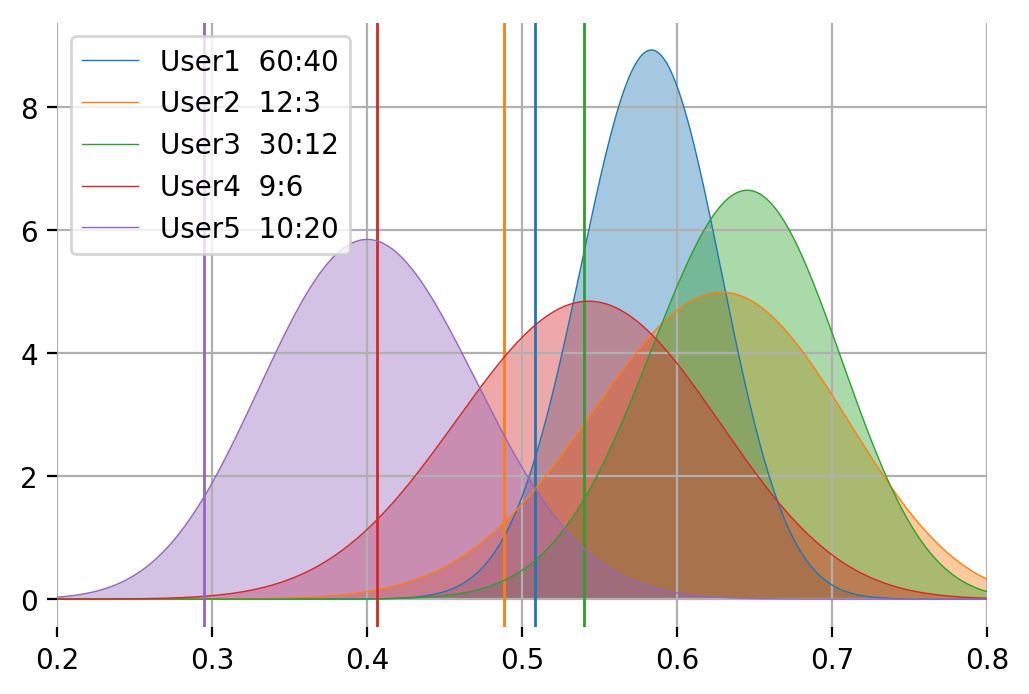

In [9]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

scores_arr = [
        ['User1', 60, 40],
        ['User2', 12, 3],
        ['User3', 30, 12],
        ['User4', 9, 6],
        ['User5', 10, 20],
               ];

score= [dict(zip(['name','up','down'], a)) for a in scores_arr]

x = np.linspace(0, 1, 1001)

plt.figure(dpi = 200)
axes = plt.gca(frameon=False)


# Prior information, movies tend to be more average and less extreme
a0, b0 = (11,11)

for i in range(len(score)):
    a = score[i]['up'] + a0
    b = score[i]['down'] + a0
    b1 = beta.pdf(x, a, b)

    p = axes.plot(x, b1, linewidth=0.5)
    p[0].set_label(f"{score[i]['name']}  {score[i]['up']}:{score[i]['down']}" )
    axes.fill_between(x, b1, alpha=0.4)

    rank = beta.ppf(0.05, a, b)
    axes.axvline(x=rank, ymin=0, ymax=1, color=p[0].get_color(), linewidth=1)

    print(f"{score[i]['name']}  {score[i]['up']}:{score[i]['down']} rank: {rank:0.2f}")

axes.grid(b=None, which='major', axis='both')

if a0 > 5:
    axes.set_xlim(0.2, 0.8)

plt.legend()